# How did Twitter react to the Coronavirus pandemic?

In [1]:
import sys
!{sys.executable} -m pip install --upgrade pip

     |████████████████████████████████| 1.5 MB 4.4 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.1
    Uninstalling pip-20.1:
      Successfully uninstalled pip-20.1


In [2]:
import sys
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install pyLDAvis

In [3]:
import re
import pandas as pd 
import nltk
from nltk.corpus import stopwords
from gensim import corpora
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import gensim
import numpy as np
from pprint import pprint
import seaborn as sns
import matplotlib.colors as mcolors

unable to import 'smart_open.gcs', disabling that module


In [5]:
df = pd.read_csv('2020-03-30 Coronavirus Tweets.CSV')

In [6]:
df.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1244414033547030529,1054394794305302528,2020-03-30T00:00:00Z,Ecodiariozac,"#Entérate Gobierno del Estado, a través de sus...",TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,679,991,NaN,2018-10-22T15:31:23Z,False,es
1,1244414034411171845,31023547,2020-03-30T00:00:00Z,Reporte_Indigo,"#PorSiNoLoViste | Si eres un cliente cumplido,...",TweetDeck,NaN,NaN,NaN,False,...,8,NaN,NaN,NaN,898366,621,NaN,2009-04-14T01:47:10Z,True,es
2,1244414033333227523,296096105,2020-03-30T00:00:00Z,tv1_rtm,Pengurusan kes-kes POSITIF COVID-19\n\n#Perint...,TweetDeck,NaN,NaN,NaN,False,...,1,NaN,NaN,NaN,38609,534,NaN,2011-05-10T05:57:18Z,False,in
3,1244414034423590913,2963716598,2020-03-30T00:00:00Z,ajplusespanol,"Médico cirujano, doctor en epidemiología y sub...",Twitter Media Studio,NaN,NaN,NaN,False,...,24,NaN,NaN,NaN,114290,668,NaN,2015-01-07T18:44:40Z,True,es
4,1244414033672855552,4856038638,2020-03-30T00:00:00Z,BlogDelRegio,La @NlSalud implementará un protocolo de inves...,TweetDeck,NaN,NaN,NaN,False,...,1,NaN,NaN,NaN,6785,1523,NaN,2016-02-03T22:48:13Z,False,es


In [7]:
df_en = df[df.lang == 'en']
df_en.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
10,1244414032964190208,15079924,2020-03-30T00:00:00Z,WFPUSA,#DidYouKnow: @WFP is 100% voluntarily funded: ...,Twitter for Advertisers,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,25816,2797,NaN,2008-06-11T01:05:43Z,True,en
12,1244414035698814977,1925199355,2020-03-30T00:00:00Z,MailMyStatement,"To treat COVID-19, administration expected to ...",eClincher,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,5932,4915,NaN,2013-10-02T01:01:01Z,False,en
13,1244414036038561792,1103013448659566592,2020-03-30T00:00:00Z,Derek_Griffin1,"To treat COVID-19, administration expected to ...",eClincher,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,1302,1159,NaN,2019-03-05T19:24:33Z,False,en
14,1244414035660947456,1968929071,2020-03-30T00:00:00Z,MDOT_BWB,@MichiganDOT will not accept cash transactions...,TweetDeck,NaN,20542307.0,MichiganDOT,False,...,1,NaN,NaN,NaN,4422,16,NaN,2013-10-18T13:40:20Z,True,en
15,1244414035396788226,20605323,2020-03-30T00:00:00Z,KTVOTV,Health experts say the risks are very low that...,TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,9139,987,NaN,2009-02-11T17:37:33Z,True,en


In [8]:
df_en_random= df_en.sample(n=5000)
df_en_random.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
320874,1244636758412800004,1110932554201223168,2020-03-30T14:45:02Z,CourseOfMind,The spread of the #coronavirus has raised a ho...,Sprout Social,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,675,111,NaN,2019-03-27T15:52:15Z,False,en
378918,1244665692797857792,1031599615970295808,2020-03-30T16:40:00Z,goldenbeaconusa,"Sadly, most of the assistance funding won't be...",Zoho Social,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,136,1076,NaN,2018-08-20T17:51:29Z,False,en
190873,1244556020711665664,1134540406056673280,2020-03-30T09:24:12Z,luqiMichigan,In the following article: Cross‐species transm...,Twitter Web App,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,731,1067,NaN,2019-05-31T19:21:26Z,False,en
406847,1244680100827877376,1136394767049330688,2020-03-30T17:37:15Z,savannahavery00,I’m 👏🏻 so 👏🏻 fucking 👏🏻 bored #stayhometho #co...,Twitter for iPhone,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,12,126,NaN,2019-06-05T22:10:00Z,False,en
266799,1244603413800923136,1241742554007080960,2020-03-30T12:32:32Z,NairRudraksh,32 New cases in Kerala.\nSave yourself and sta...,Twitter for Android,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,12,94,NaN,2020-03-22T15:04:47Z,False,en


In [11]:
# create a document of all tweets
doc_complete = []
for i in df_en_random.text:
    doc_complete.append(i)
#doc_complete

In [12]:
# remove stopwords from all tweets / documents and add to the list of stopwords
stop = stopwords.words('english')
newstop =["Covid_19","COVID19","CO","coronavirus","covid","dm","way","american","want","make","first","flt","jfk","one","every","also"
          "would","plane","aa","dfw","still","us","our","ca","your","amp","u","http","https","get","delivered","deliver","delivery"
          "please","call","could","jetblue","http", "yes", "dallas", "let","even", "take", "said","anything", "dca", "flightr",
          "must", "really", "gt", "sfo", "may", "lots", "im", "much", "rt", "lga", "dc", "san", "say", "yr", "ur", "uk", "fyi",
          "total","people","tomorrow","hold","look","think","hour","hours","guys","ever","always","everyone","would","cases","last"]
stop.extend(newstop)

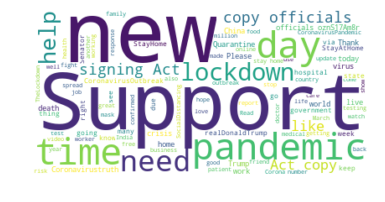

In [13]:
wc = WordCloud(background_color='white'
               ,max_words=100
               ,stopwords=stop).generate(' '.join(doc_complete))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [52]:
# clean data of stop, irrelevant and redundant words
def clean(text):
    tokenized = nltk.word_tokenize(text)
    stop_free = [i.lower() for i in tokenized if i.lower() not in stop and i.isalpha() and len(i)>3]
    return stop_free

cleaned = [clean(i) for i in doc_complete]
#print(cleaned)

In [53]:
# create a dictionary of words in the tweets /  documents
dictionary = corpora.Dictionary(cleaned)
#for i in dictionary:
    #print(i,dictionary[i])

In [54]:
#index the words and calculate the frequency of each word in each sentence
document_term_matrix = [dictionary.doc2bow(i) for i in cleaned]
#print(document_term_matrix)

In [55]:
lda = gensim.models.ldamodel.LdaModel
ldamodel = lda(document_term_matrix, num_topics=10, id2word = dictionary)
print(ldamodel)

LdaModel(num_terms=15742, num_topics=10, decay=0.5, chunksize=2000)


In [56]:
# create 10 topics
top_10 = ldamodel.print_topics(num_topics=10, num_words=10)
top_10

[(0,
  '0.015*"virus" + 0.010*"time" + 0.007*"quarantine" + 0.007*"like" + 0.007*"world" + 0.006*"china" + 0.006*"corona" + 0.006*"health" + 0.005*"help" + 0.005*"good"'),
 (1,
  '0.015*"deaths" + 0.010*"pandemic" + 0.010*"coronavirusoutbreak" + 0.007*"home" + 0.007*"today" + 0.006*"death" + 0.006*"confirmed" + 0.006*"time" + 0.005*"coronavirustruth" + 0.005*"virus"'),
 (2,
  '0.010*"home" + 0.009*"stay" + 0.006*"government" + 0.006*"like" + 0.005*"lockdown" + 0.005*"please" + 0.004*"pandemic" + 0.004*"social" + 0.004*"live" + 0.004*"tested"'),
 (3,
  '0.010*"trump" + 0.009*"stay" + 0.009*"home" + 0.008*"please" + 0.007*"realdonaldtrump" + 0.006*"coronavirustruth" + 0.005*"safe" + 0.005*"know" + 0.005*"like" + 0.005*"help"'),
 (4,
  '0.008*"update" + 0.008*"lockdown" + 0.007*"coronavirusoutbreak" + 0.006*"need" + 0.006*"countries" + 0.006*"help" + 0.006*"pandemic" + 0.005*"please" + 0.005*"fight" + 0.004*"crisis"'),
 (5,
  '0.036*"support" + 0.034*"officials" + 0.032*"signing" + 0.032*

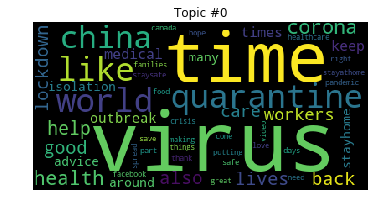

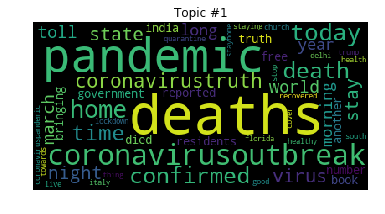

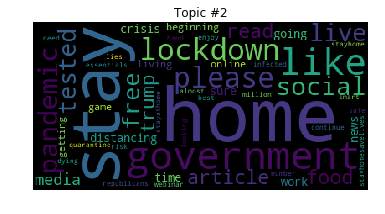

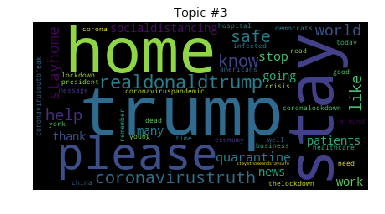

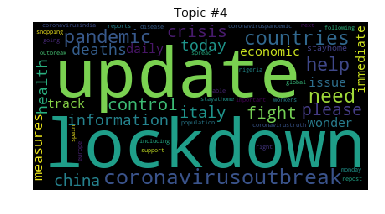

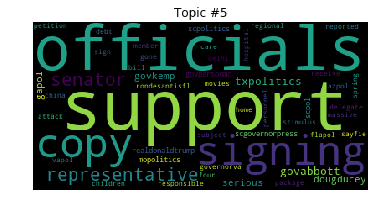

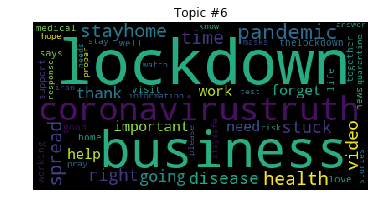

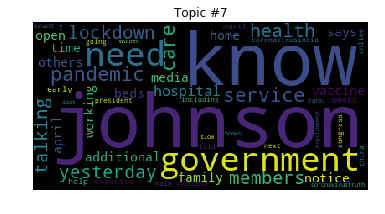

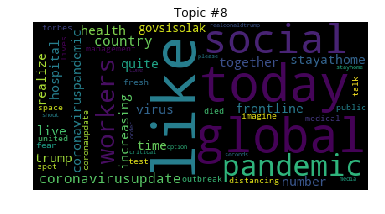

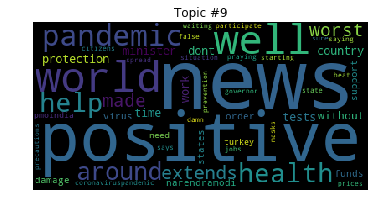

In [57]:
for t in range(ldamodel.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(ldamodel .show_topic(t, 50))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show() 

The Dominant topic and its percentage contribution in each Tweet - 
In LDA models, each Tweet is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.



In [25]:
def format_topics_sentences(ldamodel=None, corpus=document_term_matrix, texts=doc_complete):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=document_term_matrix, texts=cleaned)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,9.0,0.9307,"pandemic, china, time, world, hope, keep, spre...","[spread, raised, host, questions, help, naviga..."
1,1,8.0,0.9525,"time, stayhome, pandemic, support, china, viru...","[sadly, assistance, funding, available, immigr..."
2,2,0.0,0.9247,"lockdown, good, virus, business, corona, aroun...","[following, article, transmission, newly, iden..."
3,3,3.0,0.7743,"home, lockdown, coronavirusoutbreak, deaths, u...","[fucking, bored, stayhometho]"
4,4,2.0,0.3331,"social, distancing, home, spread, stay, work, ...","[kerala, save, stay, inside]"
5,5,7.0,0.9098,"quarantine, need, pandemic, lockdown, facebook...","[xfinity, stayathomeandstaysafe, please, remov..."
6,6,2.0,0.9469,"social, distancing, home, spread, stay, work, ...","[identify, support, institutions, best, positi..."
7,7,1.0,0.5514,"trump, test, doctors, china, pandemic, world, ...","[acosta, makes, story, trumppressconference]"
8,8,5.0,0.9665,"like, home, coronavirustruth, health, thelockd...","[healyvalley, good, news, news, changed, busin..."
9,9,7.0,0.7040,"quarantine, need, pandemic, lockdown, facebook...","[maybe, toilet, paper, shortage, hoarding, rat..."


When it comes to the keywords in the topics, the importance (weights) of the keywords matters. 
Along with that, how frequently the words have appeared in the documents is also interesting to look.

Let’s plot the word counts and the weights of each keyword in the same chart.

You want to keep an eye out on the words that occur in multiple topics and the ones whose relative frequency is more than the weight. 
Often such words turn out to be less important. 


IndexError: list index out of range

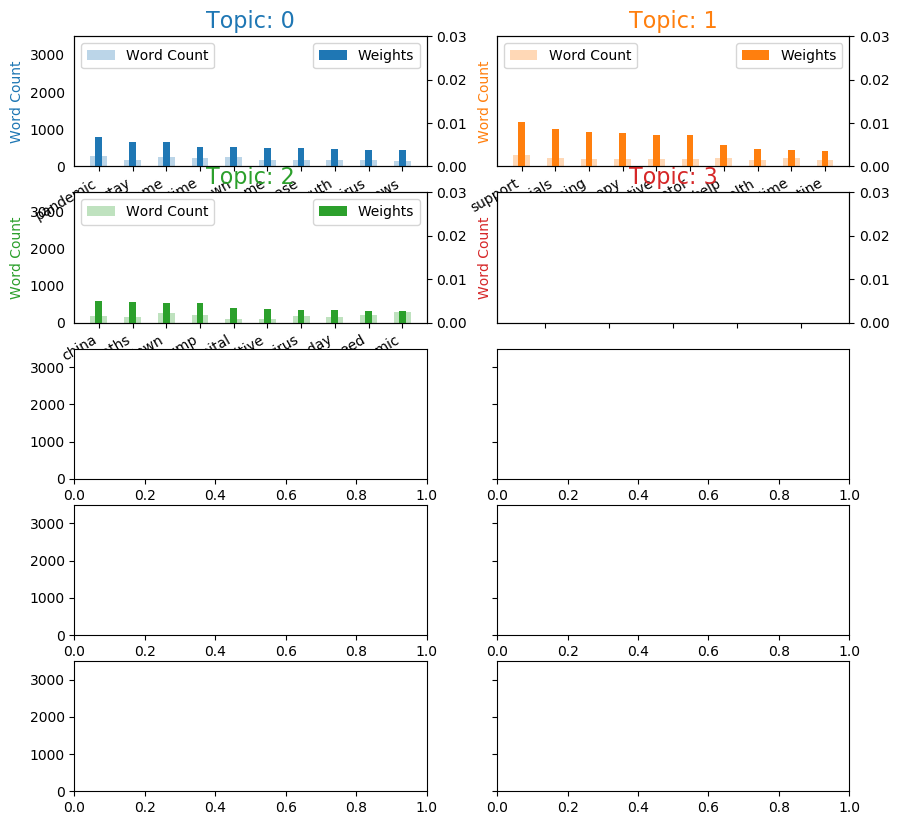

In [51]:
from collections import Counter
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in cleaned for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

dataf = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 2, figsize=(10,10), sharey=True, dpi=100)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=dataf.loc[dataf.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=dataf.loc[dataf.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(dataf.loc[dataf.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [27]:
topics

[(0,
  [('lockdown', 0.00879339),
   ('good', 0.007890751),
   ('virus', 0.0065389005),
   ('business', 0.005956727),
   ('corona', 0.005656064),
   ('around', 0.0054462436),
   ('quarantine', 0.0050184005),
   ('following', 0.004179649),
   ('like', 0.0041339225),
   ('johnson', 0.004064742)]),
 (1,
  [('trump', 0.006453316),
   ('test', 0.0063154553),
   ('doctors', 0.005327658),
   ('china', 0.005240817),
   ('pandemic', 0.0049806843),
   ('world', 0.0049416386),
   ('coronavirusoutbreak', 0.0049153245),
   ('nurses', 0.0049031987),
   ('realdonaldtrump', 0.0047735795),
   ('thousands', 0.004532331)]),
 (2,
  [('social', 0.01047454),
   ('distancing', 0.00806814),
   ('home', 0.0068765804),
   ('spread', 0.006859121),
   ('stay', 0.0060858577),
   ('work', 0.0055420683),
   ('time', 0.004936583),
   ('virus', 0.0047652964),
   ('fight', 0.004705765),
   ('going', 0.0045352913)]),
 (3,
  [('home', 0.011489227),
   ('lockdown', 0.009848275),
   ('coronavirusoutbreak', 0.009418645),
  

 visualise the information contained in a topic model.

In [28]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, document_term_matrix, dictionary=ldamodel.id2word)
vis

/Users/buinhi/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.086415 -0.069262       1        1  16.116646
2      0.052353 -0.093409       2        1  11.896756
8     -0.028893 -0.034053       3        1  10.973288
1      0.045315 -0.048919       4        1   9.795738
6     -0.212482 -0.025922       5        1   9.776703
7      0.034726  0.106833       6        1   9.060184
4      0.032699  0.066767       7        1   8.964033
3     -0.010354 -0.017354       8        1   8.938192
0      0.004861  0.111858       9        1   7.283617
9     -0.004640  0.003461      10        1   7.194842, topic_info=     Category        Freq                   Term       Total  loglift  logprob
68    Default  268.000000                support  268.000000  30.0000  30.0000
725   Default  197.000000              officials  197.000000  29.0000  29.0000
728   Default  178.000000                signing  178.000000  28.0000  28.0000
721   Default  176.000000                   copy  176.000000  27.0000  27.0000
727   Default  162.000000                senator  162.000000  26.0000  26.0000
726   Default  166.000000         representative  166.000000  25.0000  25.0000
1325  Default  107.000000                 social  107.000000  24.0000  24.0000
199   Default  168.000000                  china  168.000000  23.0000  23.0000
1318  Default   71.000000             distancing   71.000000  22.0000  22.0000
50    Default  160.000000             quarantine  160.000000  21.0000  21.0000
83    Default  116.000000                   good  116.000000  20.0000  20.0000
101   Default  256.000000                   home  256.000000  19.0000  19.0000
147   Default  124.000000                 deaths  124.000000  18.0000  18.0000
253   Default  248.000000               lockdown  248.000000  17.0000  17.0000
375   Default   73.000000                 update   73.000000  16.0000  16.0000
1140  Default   37.000000             txpolitics   37.000000  15.0000  15.0000
1139  Default   38.000000              govabbott   38.000000  14.0000  14.0000
146   Default   77.000000                  death   77.000000  13.0000  13.0000
1955  Default   78.000000                 global   78.000000  12.0000  12.0000
770   Default   90.000000            thelockdown   90.000000  11.0000  11.0000
657   Default  105.000000                  fight  105.000000  10.0000  10.0000
213   Default  154.000000    coronavirusoutbreak  154.000000   9.0000   9.0000
75    Default   95.000000               business   95.000000   8.0000   8.0000
472   Default   32.000000                   toll   32.000000   7.0000   7.0000
401   Default   57.000000                   test   57.000000   6.0000   6.0000
1866  Default   35.000000                johnson   35.000000   5.0000   5.0000
717   Default   31.000000               facebook   31.000000   4.0000   4.0000
8004  Default   24.000000                  stuck   24.000000   3.0000   3.0000
11    Default  108.000000                 spread  108.000000   2.0000   2.0000
21    Default  270.000000               pandemic  270.000000   1.0000   1.0000
...       ...         ...                    ...         ...      ...      ...
956   Topic10   22.626091                   hope   68.625237   1.5222  -5.2359
740   Topic10   12.724706                message   26.104424   1.9132  -5.8114
6507  Topic10    8.483629                players   13.389801   2.1755  -6.2169
21    Topic10   44.010006               pandemic  270.391815   0.8164  -4.5706
2501  Topic10    9.760538                 police   17.724833   2.0352  -6.0766
1031  Topic10   19.330402                  india   69.737976   1.3487  -5.3933
248   Topic10   28.836817                  world  162.786621   0.9010  -4.9933
271   Topic10   10.194618                 matter   19.932018   1.9613  -6.0331
52    Topic10   13.792323  stayathomeandstaysafe   38.864040   1.5958  -5.7309
142   Topic10   29.954969                   time  248.424255   0.5164 

In [29]:
output=open('tweet_30th.txt','w')
with open('loughran_negative.txt', 'r') as f:
    list_of_neg = [x.lower().strip('\n') for x in f.readlines()]
    negative =' '.join(list_of_neg)

add_stop=['covid-19', 'coronavirus', 'covid', 'region', 'case', 'new', 'cases']

with open('loughran_positive.txt', 'r') as f:
    list_of_pos = [x.lower().strip('\n') for x in f.readlines()]
    positive =' '.join(list_of_pos)



In [30]:
def get_neg(text):
    neg_list = []
    wordlist = (text)
    for n in set(list_of_neg):
        for word in wordlist:
            if word == n:
                neg_list.append(word)
    return neg_list

def get_pos(text):
    pos_list = []
    wordlist= (text)
    for p in set(list_of_pos):
        for word in wordlist:
            if word == p:
                pos_list.append(word)
    return pos_list

def neg_sentiment(text):
    count=0
    wordlist=nltk.word_tokenize(text.lower().strip('\n'))
    for word in wordlist:
        if word in negative:
            count+=1
    return count/len(wordlist)


def pos_sentiment(text):
    count=0
    wordlist=nltk.word_tokenize(text.lower().strip('\n'))
    for word in wordlist:
        if word in positive:
            count+=1
    return count/len(wordlist)

In [31]:
#overall common words
word_list = [word for line in cleaned for word in line]
freq=nltk.FreqDist(word_list)
print(freq.most_common(10))

[('support', 308), ('pandemic', 283), ('home', 260), ('lockdown', 250), ('help', 230), ('officials', 227), ('time', 224), ('like', 213), ('signing', 209), ('copy', 209)]


In [32]:
#neg common words
neg_list = [' '.join(get_neg(l)) for l in cleaned]
neg_list = ' '.join(neg_list)
neg_list=nltk.word_tokenize(neg_list)
neg_freq = nltk.FreqDist(neg_list)
print(neg_freq.most_common(10))

[('help', 230), ('need', 204), ('crisis', 145), ('fight', 102), ('outbreak', 89), ('death', 79), ('order', 56), ('emergency', 52), ('hard', 47), ('show', 38)]


In [33]:
pos_list = [' '.join(get_pos(l)) for l in cleaned]
pos_list = ' '.join(pos_list)
pos_list=nltk.word_tokenize(pos_list)
pos_freq = nltk.FreqDist(pos_list)
print(pos_freq.most_common(10))

[('support', 308), ('home', 260), ('help', 230), ('like', 213), ('health', 179), ('please', 170), ('know', 129), ('thank', 114), ('good', 110), ('safe', 109)]


In [34]:
def bar_chart(word,count,title,xlabel,ylabel):
    plt.figure(figsize=(7,5))
    plt.bar(word, count, width=0.4)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    locs,label = plt.xticks()
    plt.xticks(rotation=45, ha='right')
    plt.show()

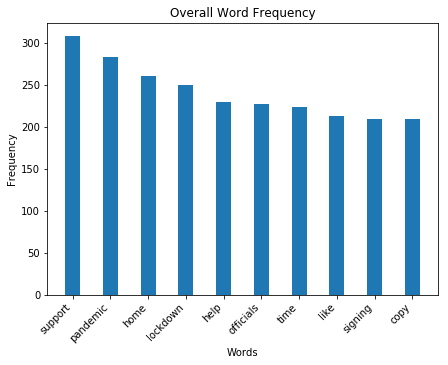

In [35]:
#Overall common
count = [c for (w,c) in freq.most_common(10)]
most10 = [w for (w,c) in freq.most_common(10)]
bar_chart(most10,count,'Overall Word Frequency','Words','Frequency')

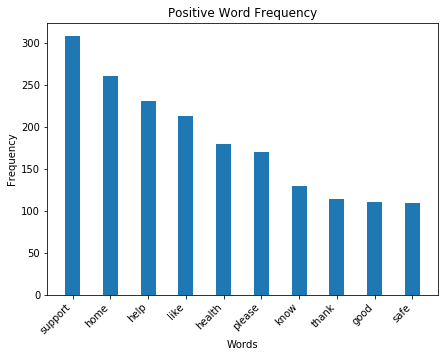

In [36]:
#positive common
count = [c for (w,c) in pos_freq.most_common(10)]
most10 = [w for (w,c) in pos_freq.most_common(10)]
bar_chart(most10,count,'Positive Word Frequency','Words','Frequency')

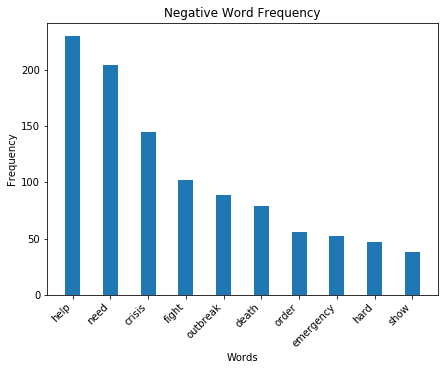

In [37]:
#negative common
count = [c for (w,c) in neg_freq.most_common(10)]
most10 = [w for (w,c) in neg_freq.most_common(10)]
bar_chart(most10,count,'Negative Word Frequency','Words','Frequency')

In [46]:
lda3 = gensim.models.ldamodel.LdaModel
ldamodel3 = lda(document_term_matrix, num_topics=3, id2word = dictionary)
print(ldamodel3)

LdaModel(num_terms=15742, num_topics=3, decay=0.5, chunksize=2000)


In [47]:
# create 3 topics
top_3 = ldamodel3.print_topics(num_topics=3, num_words=10)
top_3

[(0,
  '0.006*"virus" + 0.005*"coronavirustruth" + 0.005*"lockdown" + 0.005*"pandemic" + 0.004*"trump" + 0.004*"china" + 0.003*"time" + 0.003*"deaths" + 0.003*"stayathome" + 0.003*"quarantine"'),
 (1,
  '0.008*"home" + 0.005*"stay" + 0.005*"need" + 0.005*"like" + 0.004*"lockdown" + 0.004*"health" + 0.004*"please" + 0.003*"today" + 0.003*"work" + 0.003*"workers"'),
 (2,
  '0.008*"support" + 0.007*"officials" + 0.006*"signing" + 0.006*"copy" + 0.006*"representative" + 0.006*"senator" + 0.005*"time" + 0.005*"pandemic" + 0.004*"health" + 0.004*"help"')]

In [48]:
plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

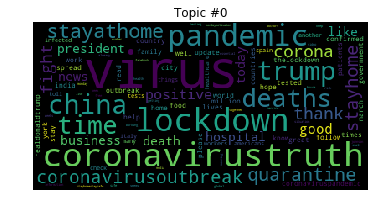

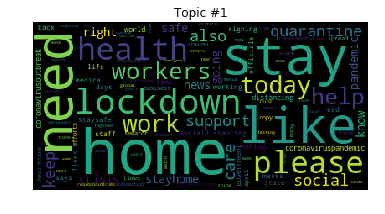

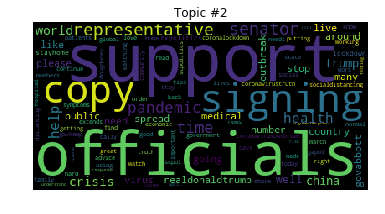

In [50]:
for t in range(ldamodel3.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(ldamodel3.show_topic(t, 100))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show() 

In [42]:
def format_topics_sentences(ldamodel=None, corpus=document_term_matrix, texts=doc_complete):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=document_term_matrix, texts=cleaned)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.7611,"china, deaths, lockdown, trump, hospital, posi...","[spread, raised, host, questions, help, naviga..."
1,1,2.0,0.6745,"china, deaths, lockdown, trump, hospital, posi...","[sadly, assistance, funding, available, immigr..."
2,2,1.0,0.6465,"support, officials, signing, copy, representat...","[following, article, transmission, newly, iden..."
3,3,0.0,0.8292,"pandemic, stay, home, time, lockdown, stayhome...","[fucking, bored, stayhometho]"
4,4,1.0,0.4922,"support, officials, signing, copy, representat...","[kerala, save, stay, inside]"


In [43]:
df_dominant_topic.groupby(["Dominant_Topic"]).count().sort_values(["Document_No"], ascending=False)

,Document_No,Topic_Perc_Contrib,Keywords,Text
Dominant_Topic,,,,
0.0,1822,1822,1822,1822
2.0,1690,1690,1690,1690
1.0,1488,1488,1488,1488


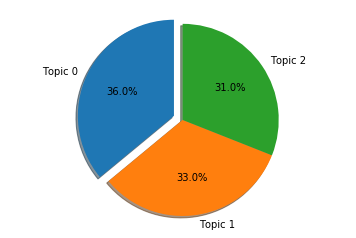

In [44]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Topic 0', 'Topic 1', 'Topic 2'
sizes = [36, 33, 31]
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

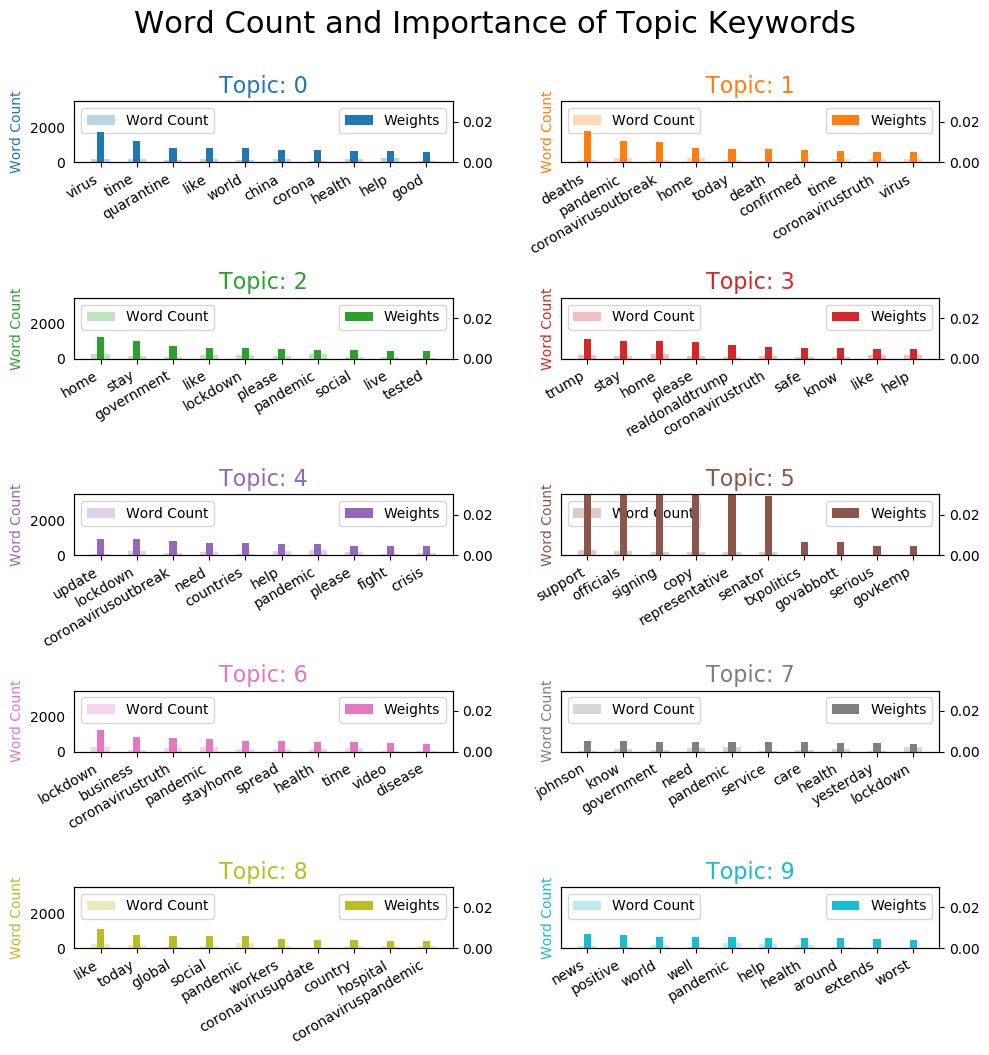

In [58]:
from collections import Counter
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in cleaned for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

dataf = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 2, figsize=(10,10), sharey=True, dpi=100)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=dataf.loc[dataf.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=dataf.loc[dataf.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(dataf.loc[dataf.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()